<a href="https://colab.research.google.com/github/enriqueasegura/Quantum-X/blob/master/QMLHEP_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quantum Computing Tasks:

1. Implement a simple quantum operation with Cirq:
*   With 5 qubits
*   Apply Hadamard operation on every qubit
*   Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
*   SWAP (0, 4)
*   Rotate X with $\frac{\pi}{2}$.
* Plot the circuit

2. Create a circuit that is a series of small cirq.Rx rotations:

* Plot the probability of measuring the state in the |0⟩ state. 

Notes for this task:

For example, for a qubit, at first, you can rotate 0.1 degree, you get one probability of measuring the state in the |0⟩ state; then you rotate another 0.1 degree in addition, you get another probability; then you another 0.1 degree and so on.

#Libraries and Stuff to Make Plots Look Presentable


In [1]:
import numpy as np
!pip install git+https://github.com/quantumlib/Cirq
  
from pandas import DataFrame
import cirq
from cirq.ops import CNOT, TOFFOLI
from cirq import Simulator
import random
from sympy import Symbol
from cirq.circuits import InsertStrategy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

#!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf


! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8

  Cloning https://github.com/quantumlib/Cirq to /tmp/pip-req-build-ynbkfo8y
  Running command git clone -q https://github.com/quantumlib/Cirq /tmp/pip-req-build-ynbkfo8y
     |████████████████████████████████| 1.2MB 4.8MB/s 
  Created wheel for cirq: filename=cirq-0.8.0.dev0-cp36-none-any.whl size=1324853 sha256=bde924342cc7fc666fe98292aa85b33ddb71f4c7758b888ed8874233c7352bf2
  Stored in directory: /tmp/pip-ephem-wheel-cache-p0h80d1q/wheels/c9/f4/ee/029123a49c5e2d75d08c2a9f937e207b88f045901db04632a7
Successfully built cirq
  Found existing installation: protobuf 3.10.0
    Uninstalling protobuf-3.10.0:
      Successfully uninstalled protobuf-3.10.0


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  lib

In [2]:
#more code for pretty plots

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
matplotlib.rcParams['text.usetex']=True
matplotlib.rcParams['text.latex.unicode']=True

from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 
!sudo dpkg --configure -a
!sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  


Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1).
texlive-fonts-recommended is already the newest version (2017.20180305-1).
The following additional packages will be installed:
  fonts-lato libruby2.5 preview-latex-style rake ruby ruby-did-you-mean
  ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration texlive-pictures texlive-plain-generic
Suggested packages:
  ri ruby-dev bundler python-pygments icc-profiles libfile-which-perl
  libspreadsheet-parseexcel-perl texlive-latex-extra-doc dot2tex prerex
  ruby-tcltk | libtcltk-ruby texlive-pictures-doc vprerex
The following NEW packages will be installed:
  fonts-lato libruby2.5 preview-latex-style rake ruby ruby-did-you-mean
  ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration texlive-latex-extra texlive-pictures
  texlive-plain-generic
0 upgraded, 15 newly instal

#Task 1

## Create 5 qubits

In [6]:
#task 1 

num_q = 5

circuit = cirq.Circuit()

#create the 5x5 grid of qubits
#However, on second though, let's just stick with a 1d array
physical_qubits = [cirq.LineQubit(i) for i in range(num_q)]
"""
for i in range(num_q):
  curr_q = cirq.GridQubit(i,i+1)
  physical_qubits.append(curr_q)

"""

#add (0,4) qubit
#physical_qubits.append(cirq.GridQubit(0,4))

print('Physical Qubits for this assignment:')
print(physical_qubits)

Physical Qubits for this assignment:
[cirq.LineQubit(0), cirq.LineQubit(1), cirq.LineQubit(2), cirq.LineQubit(3), cirq.LineQubit(4)]


## Develop Hadamard Layer : apply Hadamard operation on every qubit

Circuit with the one Hadamard Layer:


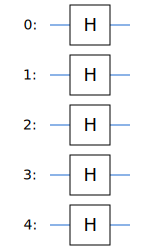

In [7]:
#execute operations 

#this defines the hadamard layer

#Apply Hadamard operation on every qubit
def hadamard_layer(q):
  #go through the available qubits present on the physical qubit list
  #and operate a Hadamard get on a given qubit
  for j in q:
    yield cirq.H(j)

#create layer on circuit
circuit.append(hadamard_layer(physical_qubits))
print('Circuit with the one Hadamard Layer:')
#print(circuit)
SVGCircuit(circuit)

##Develop CNOT Layer: apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)

Adding CNOT Gates:


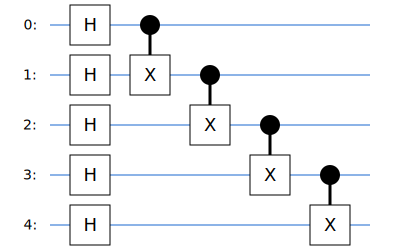

In [8]:
#Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
def cnot_layer(q, num_qubits):
  #go through the available qubits in this circuit
  #and operate a CNOT gate as intended by this task
  for i in range(num_qubits-1):
    #print(i,i+1)
    #print(q[i], q[i+1])
    yield cirq.CNOT(q[i],q[i+1])

print('Adding CNOT Gates:')
circuit.append(cnot_layer(physical_qubits, num_q))
SVGCircuit(circuit)

## SWAP Operation on Qubit Pair (0, 4)

Adding SWAP Operation:


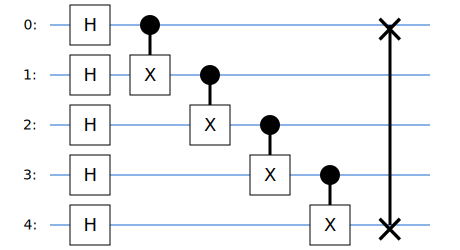

In [9]:
circuit.append(cirq.SWAP(physical_qubits[0], physical_qubits[-1]))
print('Adding SWAP Operation:')
SVGCircuit(circuit)

##Adding Rotation X with $\frac{\pi}{2}$ on gate parameter


1.   From the part of this problem it's mentioned ``` cirq.Rx``` rather than ``` cirq.XPowGate ``` so we will stick with the former function.
2.  We assume that it's intended to be like the hadamard operation, on all 5 qubits.  


In [0]:
def x_layer(q, x_angle_rads):
  gate = cirq.rx(rads=x_angle_rads)
  for i in q:
    yield gate(i)

##Putting it all together in a circuit wrapper

In [0]:
def qmlhep_circuit(num_phy_qubits, xparam_angle):
  c = cirq.Circuit()
  q = [cirq.LineQubit(i) for i in range(num_phy_qubits)]

  #hadamard operation
  h_layer = hadamard_layer(q)
  c.append(h_layer)
  
  #add cnot operation
  cx_ops = cnot_layer(q,num_phy_qubits)
  c.append(cx_ops)

  #add swap operation on first and last qubits
  c.append(cirq.SWAP(q[0], q[-1]))

  #then add x layer 
  c.append(x_layer(q,xparam_angle), strategy=InsertStrategy.NEW_THEN_INLINE)
  return c

Completed Circuit:


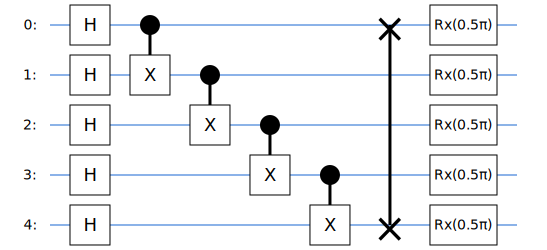

In [15]:
print('Completed Circuit:')
test = qmlhep_circuit(5, np.pi/2)
SVGCircuit(test)

#Task 2

Create a circuit that is a series of small cirq.Rx rotations and plot the probability of measuring the state in the |0⟩ state. For example, for a qubit, at first, you can rotate 0.1 degree, you get one probability of measuring the state in the |0⟩ state; then you rotate another 0.1 degree in addition, you get another probability; then you another 0.1 degree and so on.

##Example of what will happen for the one qubit example):

Resulting circuit:


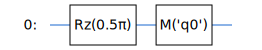

In [16]:
#let's start with a simple case, just one qubit, one X gate, and variations

c2_circuit = cirq.Circuit()
q0 = cirq.LineQubit(0)

x_gate = cirq.rz(rads=2*np.pi/4)

c2_circuit.append(x_gate(q0))

c2_circuit.append(cirq.measure(q0, key='q0'))

print('Resulting circuit:')
SVGCircuit(c2_circuit)

State Population Distribution


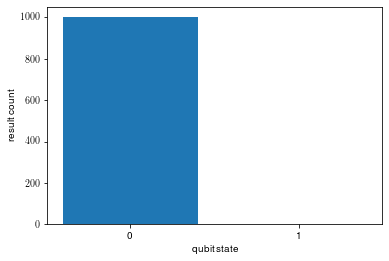

array([1000.,    0.])

In [17]:
#let's simulate this circuit 

simulator = cirq.Simulator()

num_reps = 1000

result = simulator.run(c2_circuit,repetitions=1000)
print('State Population Distribution')
cirq.plot_state_histogram(result)

##Building this example into a circuit that allows for future iterations

In [0]:
def probe_circuit(xparam):
  #this circuit takes the given xparameter
  #and builds a circuit with a X rotation to
  #that parameter

  c = cirq.Circuit()
  q = cirq.LineQubit(0)
  
  rot = cirq.rx(rads=xparam)
  c.append(rot(q))

  #execute measurement
  c.append(cirq.measure(q,key='q0'))
  return(c)

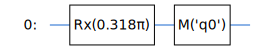

In [21]:
#testing this code:

test_probe = probe_circuit(1)
SVGCircuit(test_probe)

## Develop Code to iterate through angle values

In [0]:
angle_arr = np.arange(0,2*np.pi, 0.01)

def zero_state_probe(theta_arr, n_rep):
  #to keep track of the state population probabilities as circuit
  #is variated

  prob_zero_ket = []
  prob_one_ket = []

  #go through each value in the array
  #we want to apply as a rotation the qubit
  
  for theta in theta_arr:
    #build the circuit calling probe_circuit
    curr_circuit = probe_circuit(theta)
    
    #call simulator
    curr_simulator = cirq.Simulator()

    #call the number of repetitions to run on this circuit
    curr_results = curr_simulator.run(curr_circuit, repetitions=n_rep)
    #cirq.plot_state_histogram(curr_results)
    
    #this calls the histogram containing the counts for |0> and |1>
    #it's in an list so we use index notation to extract the right values
    
    count_results = curr_results.histogram(key='q0')

    #print(count_results)
    
    prob_one_ket.append(100*np.divide(count_results[1], n_rep))
    prob_zero_ket.append(100*np.divide(count_results[0], n_rep))

  return(prob_zero_ket, prob_one_ket)


## Deploying Probe to Examine $| 0 \rangle$ state

In [0]:
#I made this really large to not make my plot as noisy as it would 
#be if I would use 1000 reps.

num_reps = 10000

test_zero_pop = zero_state_probe(angle_arr, num_reps)

zero_ket_count = test_zero_pop[0]
one_ket_count = test_zero_pop[1]

## Visualization of $\theta$ variations on circuit from 0 to $2 \pi$

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


<Figure size 432x288 with 0 Axes>

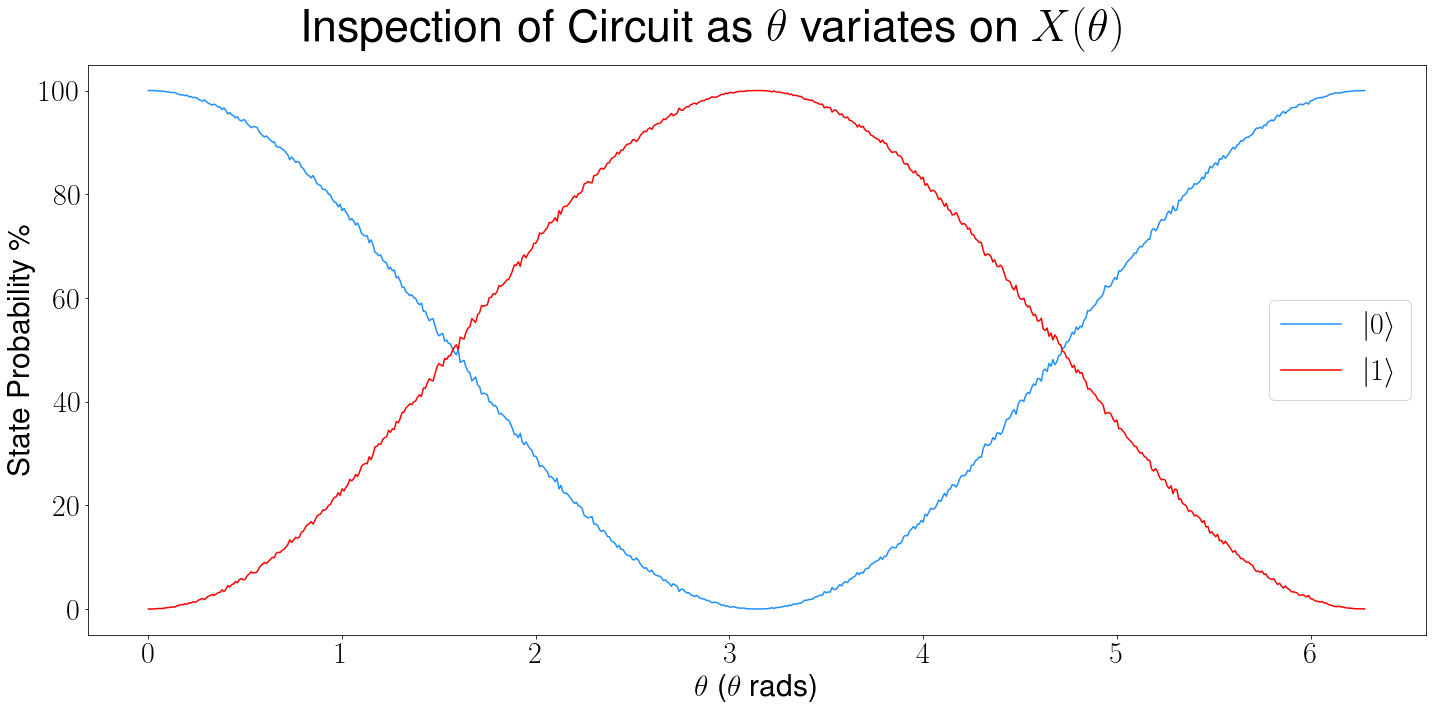

In [24]:
plt.figure(342)

plt.figure(figsize=(20,10))  

plt.plot(angle_arr,zero_ket_count, label = r'$|0 \rangle$', color='dodgerblue')
plt.plot(angle_arr, one_ket_count,  label = r'$|1 \rangle$', color='red')


plt.legend(loc='best', fontsize=30)
plt.tick_params(labelsize=30)

plt.ylabel('State Probability \%', fontsize=30)
plt.xlabel(r'$\theta$ ($\theta$ rads)', fontsize=30)

plt.legend(loc='best', fontsize=30)
plt.tick_params(labelsize=30)


plt.suptitle(r'Inspection of Circuit as $\theta$ variates on $X(\theta)$', fontsize=45)

plt.tight_layout()
plt.subplots_adjust(top=.9)

#QML on A Simple Circuit 

It has been shown on Farhi's paper on QNN that you use the readout from a qubit to modify the phase of the gate in question using SGQ. Below, we will illustrate this approach using the following circuit

In [0]:
def probe_circuit_hadamard(xparam):
  """
  this circuit takes the given xparameter
  and builds a circuit with a X rotation to
  that parameter

  We add Hadamard Layers in between the operation of interest
  """
  c = cirq.Circuit()
  q = cirq.LineQubit(0)
  #c.append(cirq.H(q))
  
  rot = cirq.rx(rads=xparam)
  c.append(rot(q))

  #c.append(cirq.H(q))
  #execute measurement
  c.append(cirq.measure(q,key='q0'))
  return(c)

In [0]:
#This is the adam implementation to find quantum label 
#I borowed this from a previous work on QML 

def qml_sgd(random_t_parameter):
  
  #this list keeps a record of the evolution of phi as optimization searches for
  #loss minimum. 
  weight_arr = []
  
  #this list keeps track of the loss function as it is being minimized.
  loss_arr =[]
  
  grad_arr =[]
  label_arr =[]
  
  zero_state_arr =[]
  one_state_arr =[]
  
  delta_theta = []
  
  status = 'not done'
  count = 0
  
  #code to implement Learning Rate Optimization
  #We used OpenAI's Adam paper as a reference.
  
  gradient_moment = 0 
  momentum_moment =0
  beta_1 = 0.9
  beta_2 = 0.999
  smoothing_epsilon = 1e-8
  learning_rate = 0.01
  
  while status == 'not done':
    count += 1
    #get results
    #print('current count: ', count)
    #print('current weight:', random_t_parameter)
    
    weight_arr.append(random_t_parameter)
    dummy_circuit = probe_circuit_hadamard(random_t_parameter)
    
    results = simulator.run(dummy_circuit, repetitions=1000)
    
    count_results = results.histogram(key='q0')
    
    #normalizing state population by repetition value
    zero_state_arr.append(count_results[0]/1000)
    one_state_arr.append(count_results[1]/1000)
    
    s_k, s_v= zip(*results.measurements.items())
  
    current_state_values = 1 - 2*np.array(s_v).astype(np.int32)

    current_predicted_label_value = np.mean(current_state_values)
    label_arr.append(current_predicted_label_value)
  
    current_loss_value = 1 - np.square(current_predicted_label_value)
    print('current loss: ', current_loss_value)
    loss_arr.append(current_loss_value)
    
    current_gradient_value = 2*current_predicted_label_value
    grad_arr.append(current_gradient_value)
    
    current_grad_square = np.square(current_gradient_value)

    
    if count > 5000:
      print('count is way too much!')
      status = 'done'
      break
    
    elif np.abs(current_loss_value) < 1e-6:
      status = 'done'
      print('Done! Final Weight: ',weight_arr[-1])
      cirq.plot_state_histogram(results)   

    else:
      """
      #This code updates the moment vector's parameters. 
      
      next_gradient_moment = beta_1*gradient_moment +(1-beta_1)*current_gradient_value
      #biased corrected first estimate 
      
      biased_gradient_moment = next_gradient_moment / (1- beta_1**count)
      
      #swap the value for the next iteration
      gradient_moment = next_gradient_moment 
      
      next_momentum_moment = beta_2*momentum_moment + (1-beta_2)*np.square(current_gradient_value)
      
      #biased corrected first estimate for momentum 
      biased_momentum_moment = next_momentum_moment / (1 - beta_2**count)
      
      #another swap
      momentum_moment = next_momentum_moment
      
      #adjust the weights to find optimal parameters 
      random_t_parameter= random_t_parameter -  learning_rate* biased_gradient_moment / (np.sqrt(biased_momentum_moment) + smoothing_epsilon)
      """
      random_t_parameter -= learning_rate*current_loss_value/current_grad_square

  return(weight_arr, loss_arr, grad_arr, weight_arr[-1], label_arr, zero_state_arr, one_state_arr)

parameter:  4.289564683547825
current loss:  0.873264
current loss:  0.825276
current loss:  0.763804
current loss:  0.802864
current loss:  0.801084
current loss:  0.844764
current loss:  0.75
current loss:  0.818524
current loss:  0.780976
current loss:  0.7884
current loss:  0.753984
current loss:  0.733744
current loss:  0.761856
current loss:  0.765744
current loss:  0.7378560000000001
current loss:  0.6975
current loss:  0.747996
current loss:  0.725424
current loss:  0.714844
current loss:  0.6975
current loss:  0.723324
current loss:  0.6659160000000001
current loss:  0.706236
current loss:  0.6155999999999999
current loss:  0.632764
current loss:  0.684156
current loss:  0.6659160000000001
current loss:  0.6031
current loss:  0.608124
current loss:  0.6519
current loss:  0.714844
current loss:  0.613116
current loss:  0.661276
current loss:  0.5617559999999999
current loss:  0.6471640000000001
current loss:  0.5457239999999999
current loss:  0.656604
current loss:  0.569664
cu

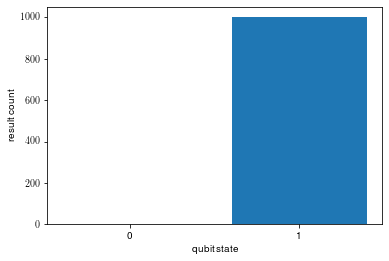

In [98]:
xparam = np.random.uniform(0,2*np.pi)
print('parameter: ', xparam)
test = qml_sgd(xparam)

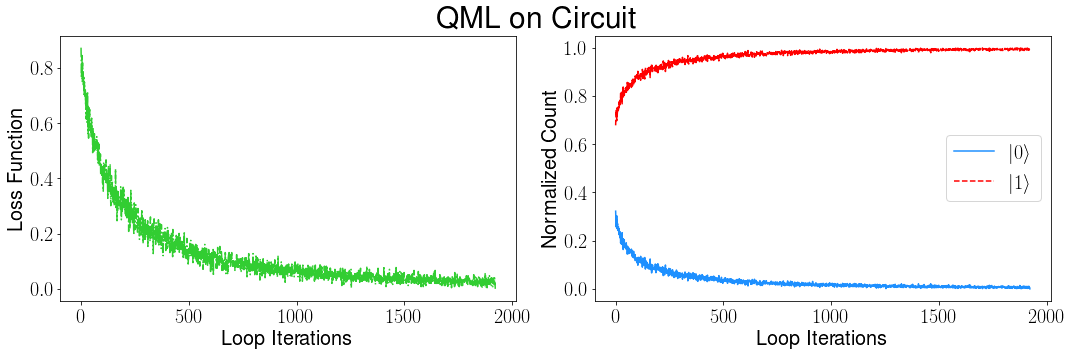

In [105]:
plot_ml = plt.figure(figsize=(15,5))
plt.subplot(121)
plt.tick_params(labelsize=20)
plt.plot(test[1], color='limegreen', linestyle='-.')

plt.ylabel('Loss Function', fontsize=20)
plt.xlabel('Loop Iterations', fontsize=20)

plt.subplot(122)

plt.plot(test[5], label = r'$|0 \rangle$', linestyle='-',color='dodgerblue') 
plt.plot( test[6], label = r'$|1 \rangle$', linestyle='--', color='red')

plt.legend(loc='best', fontsize=20)
plt.tick_params(labelsize=20)

plt.xlabel('Loop Iterations', fontsize=20)
plt.ylabel('Normalized Count', fontsize=20)

plt.suptitle(r'QML on Circuit', fontsize=30)
plt.tick_params(labelsize=20)

plt.tight_layout()

plt.subplots_adjust(top=.9)